# Dataset Folder

Link to dataset folder. Download and upload it at the root of your Google Drive.
[https://drive.google.com/drive/folders/1_bScSPOQC_MXkQXwei_HX8Toj7ukD_ug?usp=sharing](https://drive.google.com/drive/folders/1_bScSPOQC_MXkQXwei_HX8Toj7ukD_ug?usp=sharing)

In [ ]:
import os
import csv
import math
import librosa
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
global tri_Maj, tri_Min, tri_Dim, detect_chord

# Define pitch class vectors as NumPy arrays
tri_Maj = np.array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0 ,0])
tri_Min = np.array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])
tri_Dim = np.array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

tri_Maj = tri_Maj / np.linalg.norm(tri_Maj)
tri_Min = tri_Min / np.linalg.norm(tri_Min)
tri_Dim = tri_Dim / np.linalg.norm(tri_Dim)
{
  'C_Maj': [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
  'C#_Maj': [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
  'D_Maj': [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
  'D#_Maj': [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
  'E_Maj': [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1],
  'F_Maj': [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
  'F#_Maj': [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
  'G_Maj': [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
  'G#_Maj': [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
  'A_Maj': [0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
  'A#_Maj': [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
  'B_Maj': [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1],
  'C_Min': [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
  'C#_Min': [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
  'D_Min': [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
  'D#_Min': [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
  'E_Min': [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
  'F_Min': [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
  'F#_Min': [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
  'G_Min': [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
  'G#_Min': [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
  'A_Min': [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
  'A#_Min': [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
  'B_Min': [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
  'C_Dim': [1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
  'C#_Dim': [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
  'D_Dim': [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
  'D#_Dim': [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
  'E_Dim': [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
  'F_Dim': [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1],
  'F#_Dim': [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
  'G_Dim': [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
  'G#_Dim': [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1],
  'A_Dim': [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
  'A#_Dim': [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
  'B_Dim': [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1]
}
detect_chord = [['C_Maj', 'C_Min', 'C_Dim'], ['C#_Maj', 'C#_Min', 'C#_Dim'],
        ['D_Maj', 'D_Min', 'D_Dim'], ['D#_Maj', 'D#_Min', 'D#_Dim'],
        ['E_Maj', 'E_Min', 'E_Dim'], ['F_Maj', 'F_Min', 'F_Dim'],
        ['F#_Maj', 'F#_Min', 'F#_Dim'], ['G_Maj', 'G_Min', 'G_Dim'],
        ['G#_Maj', 'G#_Min', 'G#_Dim'], ['A_Maj', 'A_Min', 'A_Dim'],
        ['A#_Maj', 'A#_Min', 'A#_Dim'], ['B_Maj', 'B_Min', 'B_Dim']]

In [ ]:
def gen_chromagram(x, fs):

  # Isolate harmonic content in audio signal
  x_harm = librosa.effects.harmonic(y=x, margin=8)

  # Generate Chromagram
  chroma = librosa.feature.chroma_cqt(y=x_harm, sr=fs)
  time_stamps = (np.arange(0, chroma.shape[1]) * 512) / fs

  # Remove noise
  chroma_filter = np.minimum(chroma,
                           librosa.decompose.nn_filter(chroma,
                                                       aggregate=np.median,
                                                       metric='cosine'))

  # Prevent discontinuity
  chroma_smooth = sc.ndimage.median_filter(chroma_filter, size=(1, 9))

  #librosa.display.specshow(chroma_smooth, y_axis='chroma', x_axis='time')
  return chroma_smooth,time_stamps

In [ ]:
def find_chord(normalized_x,num_chroma,norm):
  r = np.zeros([4, num_chroma], dtype=float)
  if norm == 'L1':
    for i in range(num_chroma):
      r[0][i] = np.sum(np.abs(normalized_x - tri_Maj))
      r[1][i] = np.sum(np.abs(normalized_x - tri_Min))
      r[2][i] = np.sum(np.abs(normalized_x - tri_Dim))

      normalized_x = np.roll(normalized_x, -1)

  elif norm == 'L2':
    for i in range(num_chroma):
      r[0][i] = (np.sum(np.square(normalized_x - tri_Maj))) ** 0.5
      r[1][i] = (np.sum(np.square(normalized_x - tri_Min))) ** 0.5
      r[2][i] = (np.sum(np.square(normalized_x - tri_Dim))) ** 0.5

      normalized_x = np.roll(normalized_x, -1)

  else:
    raise TypeError('Invalid argument')

  idx = np.zeros(3, dtype=int)
  val = np.zeros(3, dtype=float)

  idx[0] = np.argmin(r[0])
  idx[1] = np.argmin(r[1])
  idx[2] = np.argmin(r[2])

  val[0] = np.min(r[0][idx[0]])
  val[1] = np.min(r[1][idx[1]])
  val[2] = np.min(r[2][idx[2]])

  return detect_chord[idx[np.argmin(val)]][np.argmin(val)]

In [ ]:

def find_pitch_3(x, fs, norm, mode='blocked'):
  if mode == 'average':
    x = gen_chromagram(x, fs)[0]

    # 0~3: Maj, Min, Aug, Dim
    num_chroma = x.shape[0]
    x_sum = np.zeros([x.shape[0]], dtype=float)
    r = np.zeros([3, x.shape[0]], dtype=float)

    for i in range(x.shape[0]):
      x_sum[i] = np.sum(x[i])

    normalized_x = x_sum / np.linalg.norm(x_sum)
    current_chord = find_chord(normalized_x, num_chroma, 'L2')
    return current_chord
  else:
    x,time_stamps = gen_chromagram(x, fs)
    time_stamps = time_stamps[np.any(x, axis=0)]
    x = x[:,np.any(x, axis=0)]
    # 0~3: Maj, Min, Aug, Dim
    num_chroma = x.shape[0]
    numBlocks = x.shape[1]
    chord_list = []
    time_list = []
    for i in range(numBlocks):
      chroma_block = x[:,i]
      normalized_x = chroma_block / np.linalg.norm(chroma_block)
      current_time = time_stamps[i]
      current_chord = find_chord(normalized_x, num_chroma, 'L2')
      chord_list.append(current_chord)
      time_list.append(current_time)
    chord_list = np.asarray(chord_list)
    time_list = np.asarray(time_list)
    return chord_list, time_list

In [ ]:
def get_chord_score(result, truth_str):
  chordtype_score = 0
  root_score = 0
  truth_str = truth_str.replace("s", "#") # Fix inconsistency of using 's' to denote sharp rather than '#'
  truth_root = truth_str.split("_")[0] # Get truth root note
  truth_chordtype = truth_str.split("_")[1].lower()
  result_root = result.split("_")[0]
  result_chordtype = (result.split("_")[1]).lower()
  ground_truth_chord = truth_root + '_' + truth_chordtype.capitalize()
  # Test if chordtypes are the same
  if truth_chordtype == result_chordtype:
    chordtype_score += 1
  # Test if root notes are the same
  if truth_root == result_root:
    root_score += 1
  elif (truth_root == "Db" and result_root == "C#"): # Enharmonics
    root_score += 1
  elif (truth_root == "Eb" and result_root == "D#"): # Enharmonics
    root_score += 1
  elif (truth_root == "Gb" and result_root == "F#"): # Enharmonics
    root_score += 1
  elif (truth_root == "Ab" and result_root == "G#"): # Enharmonics
    root_score += 1
  elif (truth_root == "Bb" and result_root == "A#"): # Enharmonics
    root_score += 1
  return chordtype_score, root_score, ground_truth_chord

In [ ]:
from copy import Error
def eval_dataset(path, sr=44100, display_plot=True, use_filename_for_truth=False, groundtruthpath=None):
	pathname = path
	numberOfTests = 0
	root_score = 0
	chordtype_score = 0
	total_score = 0
	file_list = os.listdir(pathname)
	plot_description = ''
	for file in file_list:
		times = []
		chords = []
		ground_truth_times = []
		ground_truth_chords = []
		file_pathname = pathname + file
		filename = file_pathname.split(pathname)[1].replace('.wav', '')
		x, fs = librosa.load(file_pathname, sr=sr)
		plot_description = 'Source: ' + pathname + ' (Custom Dataset - see paper for more details)'
		# Code for use filename ground truth:
		if (use_filename_for_truth==False and groundtruthpath==None):
			raise ValueError('groundtruthpath==None when use_filename_for_truth==False. Please specify a path to the ground truth annotation files by setting groundtruthpath to the directory which these files are located in.')
		elif (use_filename_for_truth == True):
			truth_str = file.replace("s", "#") # Fix inconsistency of using 's' to denote sharp rather than '#'
			result = find_pitch_3(x, fs, 'L2', 'average')
			chord_score = get_chord_score(result, truth_str) # Using the filename for truth assumes the chord occurs only once in the file, thus the results should be averaged
			chordtype_score += chord_score[0]
			root_score += chord_score[1]
			numberOfTests += 1
		# Code to use for other:
		else:
			ground_truth_filename = groundtruthpath + filename + '.csv'
			details = filename.split('__')
			artist = details[0].replace('_', ' ')
			song = details[1].replace('_', ' ')
			description = details[2].replace('_', ' ')
			plot_description = 'Source: ' + song + ' by ' + artist + ' with details: ' + description
			chords,times = find_pitch_3(x, fs, 'L2', 'blocked')
			with open(ground_truth_filename, newline='') as csvfile:
				ground_truth_reader = csv.reader(csvfile, delimiter=',')
				first_row = True
				offset = 0.0 # Starting offset of ground truth data
				for row in ground_truth_reader:
					if first_row:
						offset = float(row[0])
						first_row = False
					first_onset = float(row[0]) - offset
					second_onset = float(row[1]) - offset
					chord_name = row[2].replace(':','_')
					ground_truth_times.append(first_onset)
					ground_truth_times.append(second_onset)
					ground_truth_chords.append(chord_name)
					ground_truth_chords.append(chord_name)
					numberOfTests += 1
			if (display_plot == True and use_filename_for_truth == False):
				plt.figure(figsize=(10,7))
				fig, ax = plt.subplots(figsize=(10,7))
				plt.figtext(0.5, 0.03, plot_description, ha="center", fontsize=12)
				plt.title('Chords detected vs. Time')
				ground_truth_times = np.asarray(ground_truth_times, dtype=np.float64)
				plt.plot(times,chords, linestyle='solid')
				plt.plot(ground_truth_times,ground_truth_chords, linestyle='dashed')
				plt.legend(['Computer Detected', 'Ground Truth'])
				plt.xlabel("Time (seconds)")
				plt.ylabel("Chord Name")
				line_data_x = ax.lines[0].get_xdata(orig=False)
				ground_truth_line_data_x = ax.lines[1].get_xdata(orig=False)
				line_data_y = ax.lines[0].get_ydata(orig=False)
				ground_truth_line_data_y = ax.lines[1].get_ydata(orig=False)
				x_length = len(line_data_x)
				ground_truth_x_length = len(ground_truth_line_data_x)
				y_length = len(line_data_y)
				ground_truth_y_length = len(ground_truth_line_data_y)
				if x_length != y_length:
					raise Error('x_length != y_length')
				if ground_truth_x_length != ground_truth_y_length:
					raise Error('ground_truth_x_length != ground_truth_y_length')
				repeat_length = y_length - ground_truth_y_length
				ground_truth_line_data_y = np.repeat(ground_truth_line_data_y, np.ceil(repeat_length / len(ground_truth_line_data_y)))
				mean_squared_error = (np.square(line_data_y[0:len(ground_truth_line_data_y)] - ground_truth_line_data_y)).mean(axis=0)
				chord_test_result_string = "Mean Squared Error: " + str(mean_squared_error)
				plt.figtext(0.5, 0.0, chord_test_result_string, ha="center", fontsize=12)
	if (use_filename_for_truth == True and display_plot == True):
		chordtype_score = chordtype_score / numberOfTests;
		root_score = root_score / numberOfTests;
		total_score = (root_score + chordtype_score) / 2; # Total score is an average of the two scores
		chord_test_result_string = "Chord Type Score: " + str(chordtype_score) + " Root Note Score: " + str(root_score) + " Total Score: " + str(total_score)
		plt.figure(figsize=(10,10))
		plt.figtext(0.5, 0.03, plot_description, ha="center", fontsize=12)
		plt.figtext(0.5, 0.0, chord_test_result_string, ha="center", fontsize=12)
		chord_properties = ['Chord Type Score', 'Chord Root Score', 'Total Score']
		values = [chordtype_score, root_score, total_score]
		plt.bar(chord_properties, values)
		plt.xlabel('Chord Property')
		plt.ylabel('Score (0.0-1.0)')
		plt.title('Detection scores by chord properties')

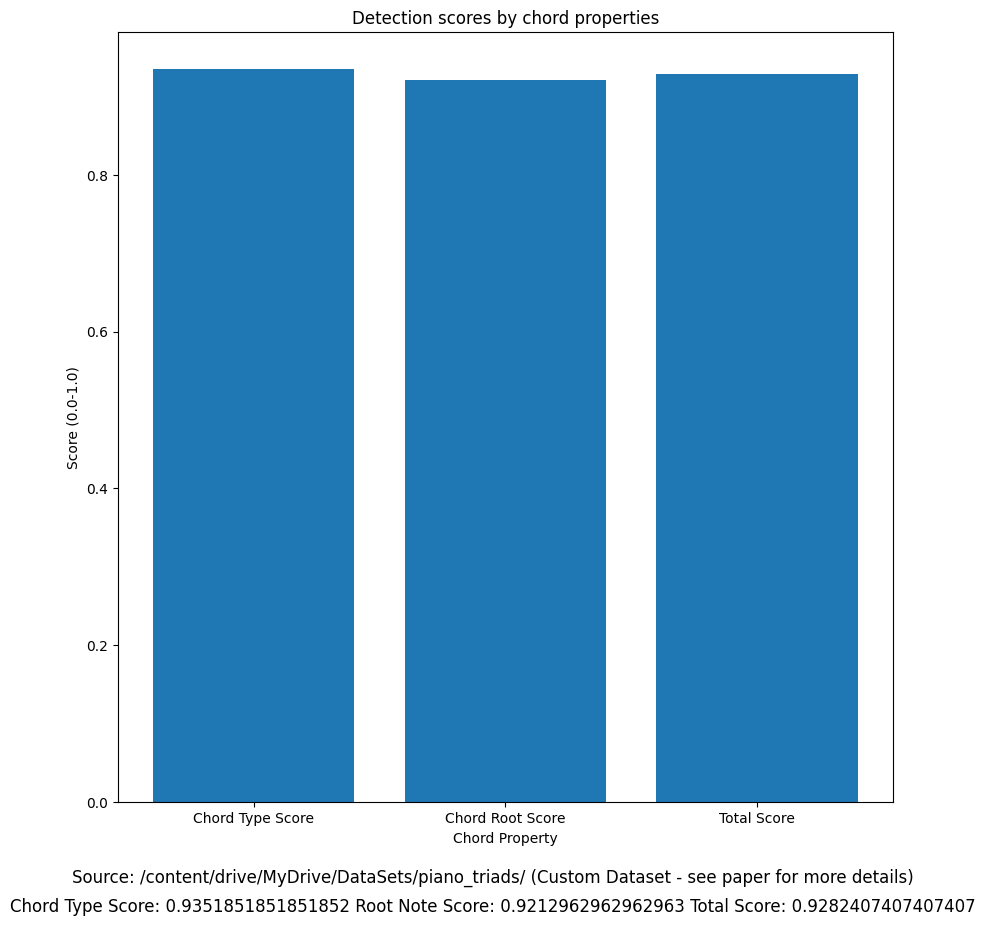

In [ ]:
eval_dataset('/content/drive/MyDrive/DataSets/piano_triads/', use_filename_for_truth=True)

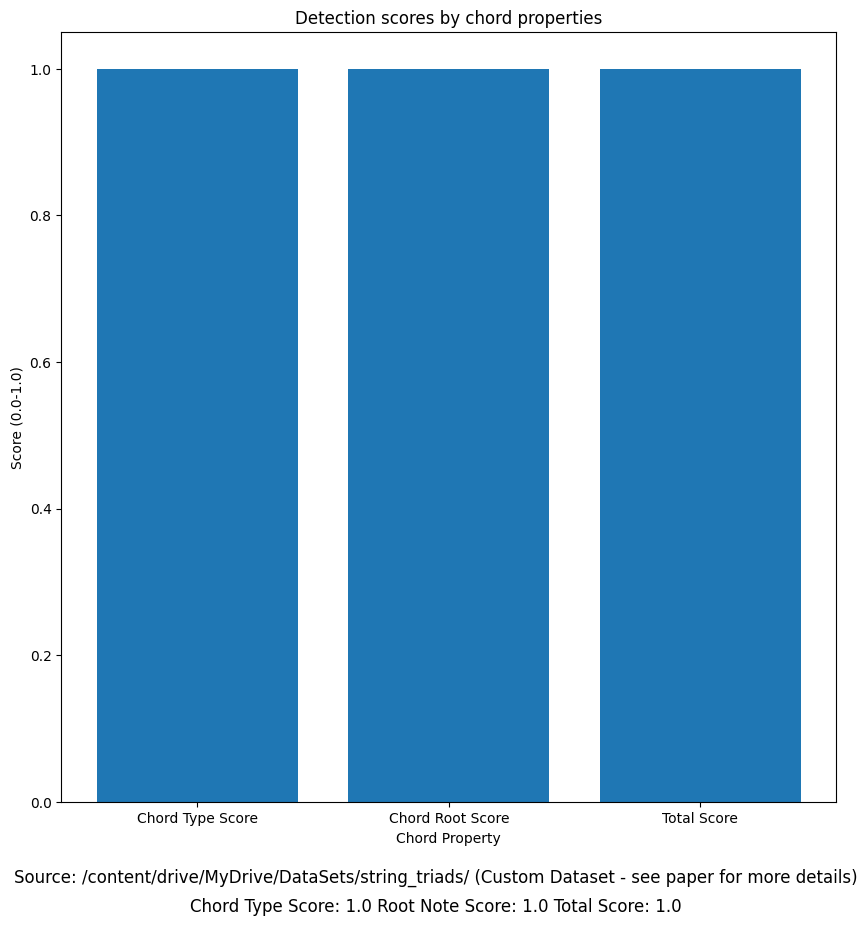

In [ ]:
eval_dataset('/content/drive/MyDrive/DataSets/string_triads/', use_filename_for_truth=True)

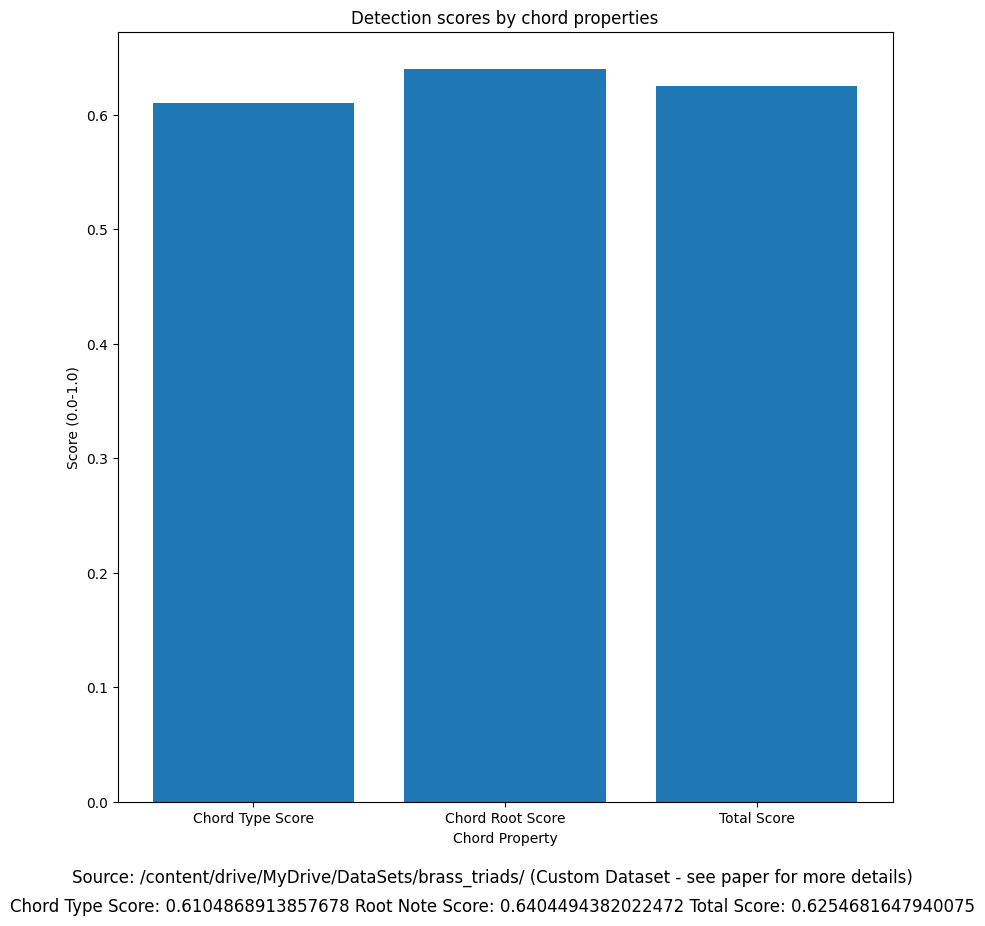

In [ ]:
eval_dataset('/content/drive/MyDrive/DataSets/brass_triads/', use_filename_for_truth=True)

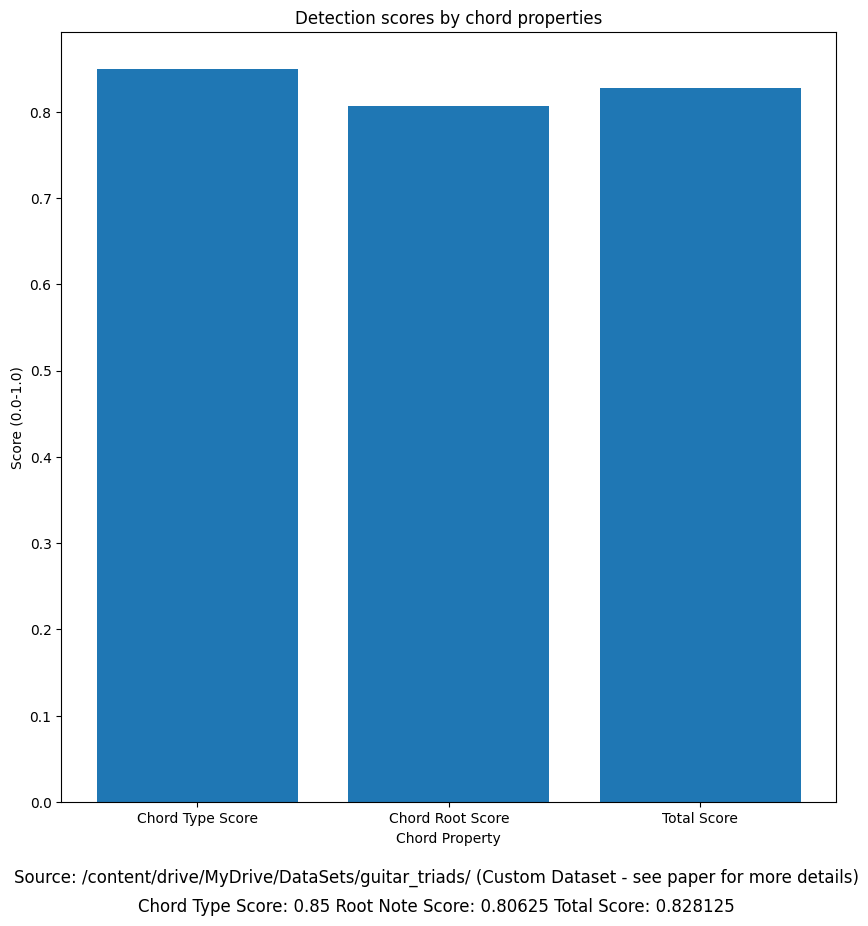

In [ ]:
eval_dataset('/content/drive/MyDrive/DataSets/guitar_triads/', sr=16000, use_filename_for_truth=True)

/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


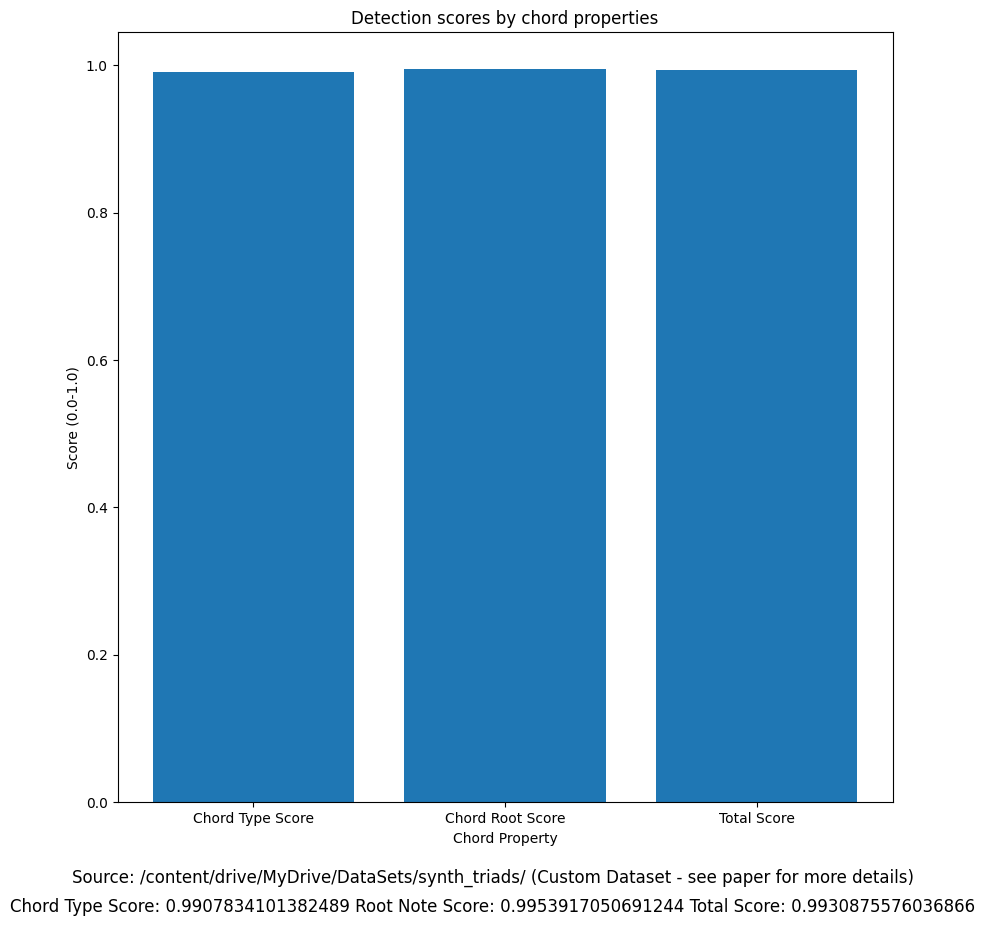

In [ ]:
eval_dataset('/content/drive/MyDrive/DataSets/synth_triads/', use_filename_for_truth=True)

<Figure size 1000x700 with 0 Axes>

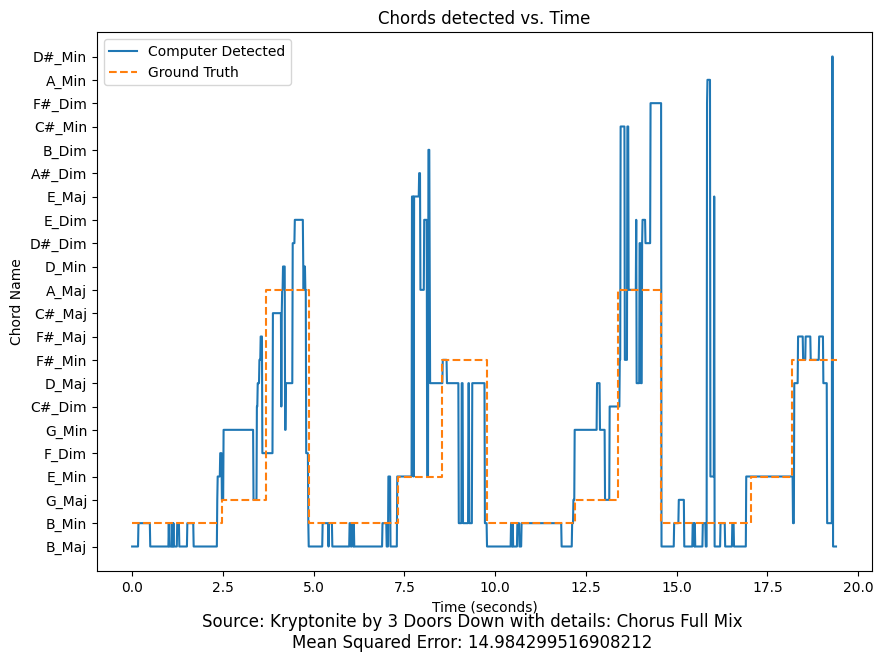

<Figure size 1000x700 with 0 Axes>

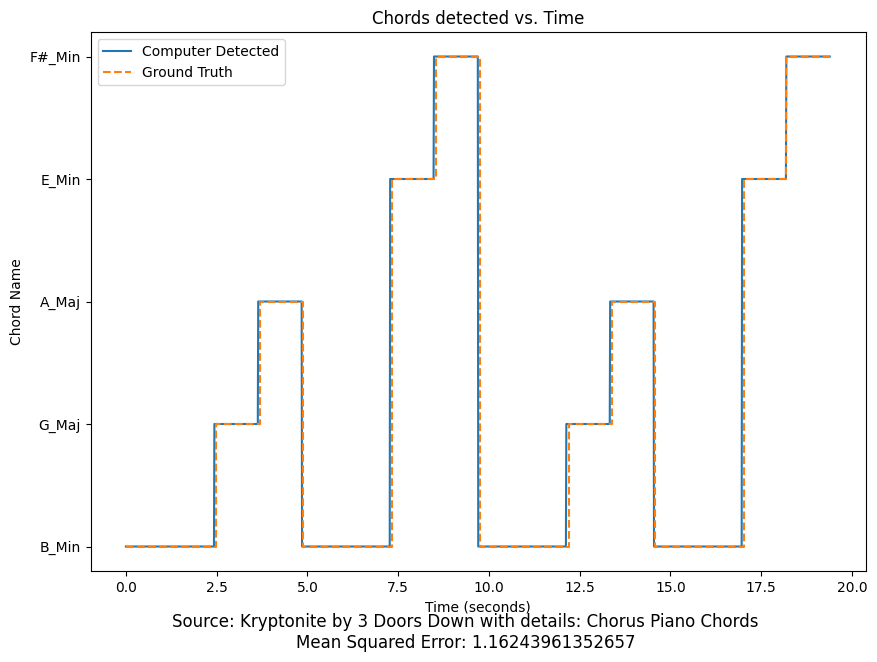

<Figure size 1000x700 with 0 Axes>

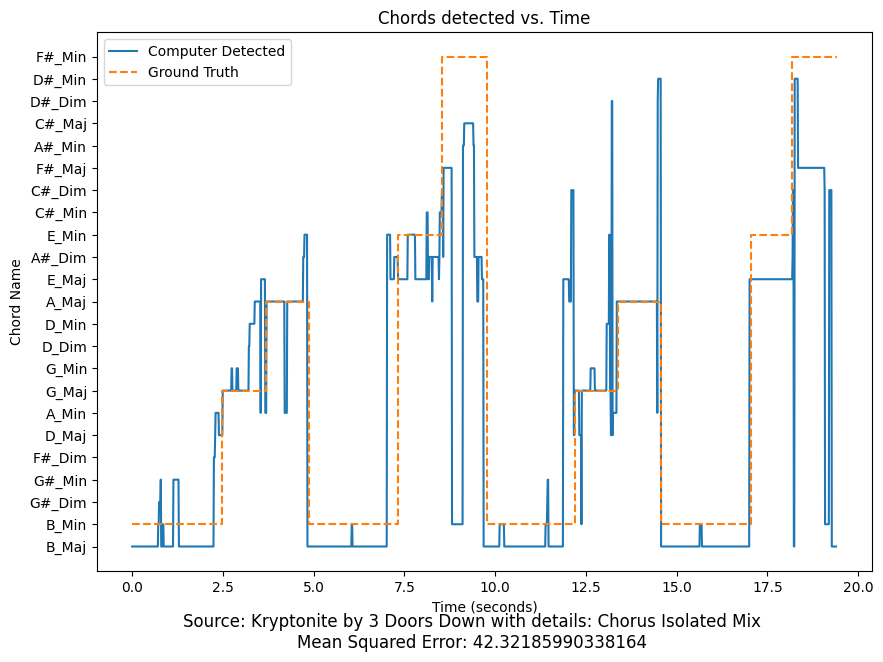

In [ ]:
eval_dataset(path='/content/drive/MyDrive/DataSets/misc/', groundtruthpath='/content/drive/MyDrive/DataSets/ground_truths/misc/')